In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [0]:
#initializing the data with true value and target value
X = np.random.rand(100, 1)
X = np.sort(X, axis = 0)
TrueY = np.zeros((100, 1))
for i in range(0, TrueY.shape[0]):
  TrueY[i] += np.exp(np.cos(2*np.pi*X[i]))

TargetY = TrueY + np.sqrt(0.2)*np.random.randn(100, 1)

In [0]:
#splitting the data into test and train
data_ = np.concatenate((X, TrueY, TargetY), axis = 1)
data_train, data_test = train_test_split(data_, test_size = 0.2)
data_train, data_exp = train_test_split(data_train, test_size = 0.125)

In [0]:
#power matrix A/Phi
def MatrixA(X, degree):
  A = np.zeros((X.shape[0], degree + 1))
  for i in range(0, X.shape[0]):
    for j in range(0, degree + 1):
      A[i, j] += X[i]**j

  return(A)

In [0]:
#case 1: 10 data points
#calculating power matrix for 10 points
MatrixA10Deg1 = MatrixA(data_exp[:, 0], 1)
MatrixA10Deg3 = MatrixA(data_exp[:, 0], 3)
MatrixA10Deg6 = MatrixA(data_exp[:, 0], 6)
MatrixA10Deg9 = MatrixA(data_exp[:, 0], 9)

In [0]:
#calculating the params W using ((inv(A.T dot A)) dot A) dot TargetY, 10 points
ParamW10Deg1 = np.dot(np.dot((np.linalg.inv(np.dot(np.transpose(MatrixA10Deg1), MatrixA10Deg1))), np.transpose(MatrixA10Deg1)), data_exp[:, 2])
ParamW10Deg3 = np.dot(np.dot((np.linalg.inv(np.dot(np.transpose(MatrixA10Deg3), MatrixA10Deg3))), np.transpose(MatrixA10Deg3)), data_exp[:, 2])
ParamW10Deg6 = np.dot(np.dot((np.linalg.inv(np.dot(np.transpose(MatrixA10Deg6), MatrixA10Deg6))), np.transpose(MatrixA10Deg6)), data_exp[:, 2])
ParamW10Deg9 = np.dot(np.dot((np.linalg.inv(np.dot(np.transpose(MatrixA10Deg9), MatrixA10Deg9))), np.transpose(MatrixA10Deg9)), data_exp[:, 2])

In [0]:
print(ParamW10Deg1)
print(ParamW10Deg3)
print(ParamW10Deg6)
print(ParamW10Deg9)

[1.36774782 0.21617597]
[ 2.6801688  -9.06322965  9.29382379 -0.01053911]
[    2.85709749    -6.63712991   -77.54902534   532.8735439
 -1268.85944596  1305.95388495  -486.92337859]
[ 1.60336099e+01 -6.30744817e+02  1.10064676e+04 -9.79349333e+04
  4.91228394e+05 -1.46595770e+06  2.64741779e+06 -2.82988177e+06
  1.64369594e+06 -3.99045746e+05]


In [0]:
#calculating power matrix for the whole dataset
XDeg1 = MatrixA(data_[:, 0], 1)
XDeg3 = MatrixA(data_[:, 0], 3)
XDeg6 = MatrixA(data_[:, 0], 6)
XDeg9 = MatrixA(data_[:, 0], 9)

In [0]:
#conducting regression calculation, 10 points
RegY10Deg1 = np.dot(XDeg1, ParamW10Deg1)
RegY10Deg3 = np.dot(XDeg3, ParamW10Deg3)
RegY10Deg6 = np.dot(XDeg6, ParamW10Deg6)
RegY10Deg9 = np.dot(XDeg9, ParamW10Deg9)

In [0]:
from google.colab import files

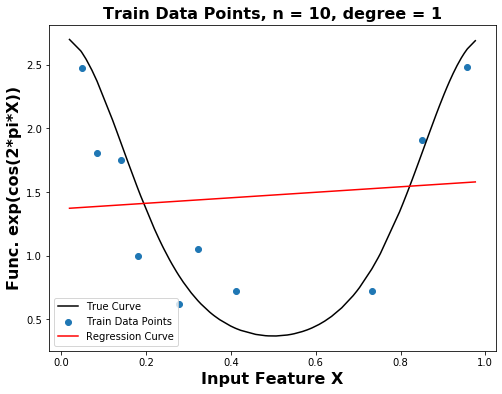

In [0]:
plt.figure(1, figsize=(8,6))
plot_1 = plt.plot(data_[:, 0], data_[:, 1], color = 'black', label='True Curve')
plot_2 = plt.scatter(data_exp[:, 0], data_exp[:, 2], label='Train Data Points')
plot_3 = plt.plot(data_[:, 0], RegY10Deg1, color = 'red', label='Regression Curve')
plt.xlabel('Input Feature X', fontweight='bold', fontsize=16)
plt.ylabel('Func. exp(cos(2*pi*X))', fontweight='bold', fontsize=16)
plt.legend(handles = [plot_1[0], plot_2, plot_3[0]], loc = 'lower left')
plt.title('Train Data Points, n = 10, degree = 1', fontweight='bold', fontsize=16)
plt.savefig('tdp_10_1.png')
files.download('tdp_10_1.png')

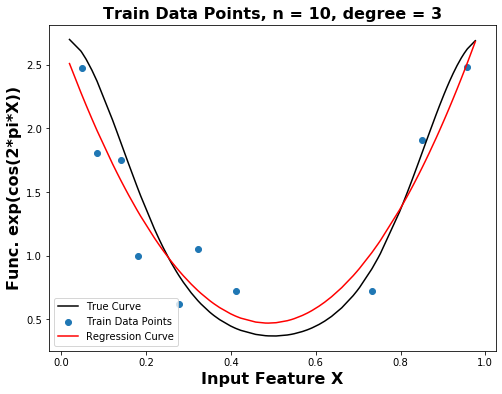

In [0]:
plt.figure(1 ,figsize=(8,6))
plot_4 = plt.plot(data_[:, 0], data_[:, 1], color = 'black', label='True Curve')
plot_5 = plt.scatter(data_exp[:, 0], data_exp[:, 2], label='Train Data Points')
plot_6 = plt.plot(data_[:, 0], RegY10Deg3, color = 'red', label='Regression Curve')
plt.xlabel('Input Feature X', fontweight='bold', fontsize=16)
plt.ylabel('Func. exp(cos(2*pi*X))', fontweight='bold', fontsize=16)
plt.legend(handles = [plot_4[0], plot_5, plot_6[0]], loc = 'lower left')
plt.title('Train Data Points, n = 10, degree = 3', fontweight='bold', fontsize=16)
plt.savefig('tdp_10_3.png')
files.download('tdp_10_3.png')

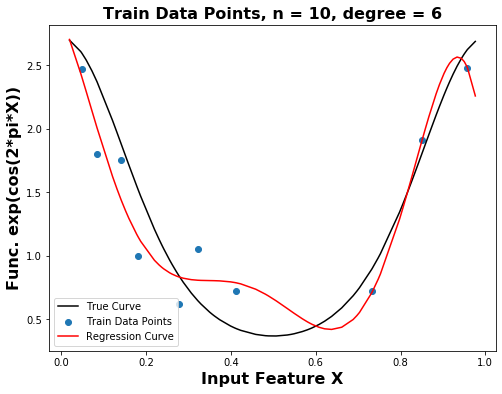

In [0]:
plt.figure(1, figsize=(8,6))
plot_7 = plt.plot(data_[:, 0], data_[:, 1], color = 'black', label='True Curve')
plot_8 = plt.scatter(data_exp[:, 0], data_exp[:, 2], label='Train Data Points')
plot_9 = plt.plot(data_[:, 0], RegY10Deg6, color = 'red', label='Regression Curve')
plt.xlabel('Input Feature X', fontweight='bold', fontsize=16)
plt.ylabel('Func. exp(cos(2*pi*X))', fontweight='bold', fontsize=16)
plt.legend(handles = [plot_7[0], plot_8, plot_9[0]], loc = 'lower left')
plt.title('Train Data Points, n = 10, degree = 6', fontweight='bold', fontsize=16)
plt.savefig('tdp_10_6.png')
files.download('tdp_10_6.png')

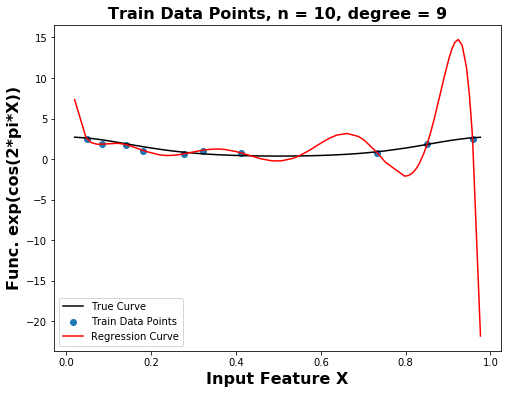

In [0]:
plt.figure(1, figsize=(8,6))
plot_10 = plt.plot(data_[:, 0], data_[:, 1], color = 'black', label='True Curve')
plot_11 = plt.scatter(data_exp[:, 0], data_exp[:, 2], label='Train Data Points')
plot_12 = plt.plot(data_[:, 0], RegY10Deg9, color = 'red', label='Regression Curve')
plt.xlabel('Input Feature X', fontweight='bold', fontsize=16)
plt.ylabel('Func. exp(cos(2*pi*X))', fontweight='bold', fontsize=16)
plt.legend(handles = [plot_10[0], plot_11, plot_12[0]], loc = 'lower left')
plt.title('Train Data Points, n = 10, degree = 9', fontweight='bold', fontsize=16)
plt.savefig('tdp_10_9.png')
files.download('tdp_10_9.png')

In [0]:
#case 2: larger values range
#calculating power matrix for larger numebr of data points (say whole data_train)
MatrixA80Deg1 = MatrixA(data_train[:, 0], 1)
MatrixA80Deg3 = MatrixA(data_train[:, 0], 3)
MatrixA80Deg6 = MatrixA(data_train[:, 0], 6)
MatrixA80Deg9 = MatrixA(data_train[:, 0], 9)

In [0]:
#calculating the params W using ((inv(A.T dot A)) dot A) dot TargetY, 80 points
ParamW80Deg1 = np.dot(np.dot((np.linalg.inv(np.dot(np.transpose(MatrixA80Deg1), MatrixA80Deg1))), np.transpose(MatrixA80Deg1)), data_train[:, 2])
ParamW80Deg3 = np.dot(np.dot((np.linalg.inv(np.dot(np.transpose(MatrixA80Deg3), MatrixA80Deg3))), np.transpose(MatrixA80Deg3)), data_train[:, 2])
ParamW80Deg6 = np.dot(np.dot((np.linalg.inv(np.dot(np.transpose(MatrixA80Deg6), MatrixA80Deg6))), np.transpose(MatrixA80Deg6)), data_train[:, 2])
ParamW80Deg9 = np.dot(np.dot((np.linalg.inv(np.dot(np.transpose(MatrixA80Deg9), MatrixA80Deg9))), np.transpose(MatrixA80Deg9)), data_train[:, 2])

In [0]:
print(ParamW80Deg1)
print(ParamW80Deg3)
print(ParamW80Deg6)
print(ParamW80Deg9)

[0.84911206 0.63019698]
[ 2.84588946 -8.67837791  4.32848604  4.98701163]
[   2.6424162     1.4802177  -104.82683062  449.68243825 -826.99714374
  711.40823837 -229.88769377]
[ 4.19116287e+00 -7.02870124e+01  9.22362943e+02 -6.39304762e+03
  2.43154572e+04 -5.44934922e+04  7.43496897e+04 -6.10392901e+04
  2.78912139e+04 -5.48389158e+03]


In [0]:
#calculation for regression, 80 points
RegY80Deg1 = np.dot(XDeg1, ParamW80Deg1)
RegY80Deg3 = np.dot(XDeg3, ParamW80Deg3)
RegY80Deg6 = np.dot(XDeg6, ParamW80Deg6)
RegY80Deg9 = np.dot(XDeg9, ParamW80Deg9)

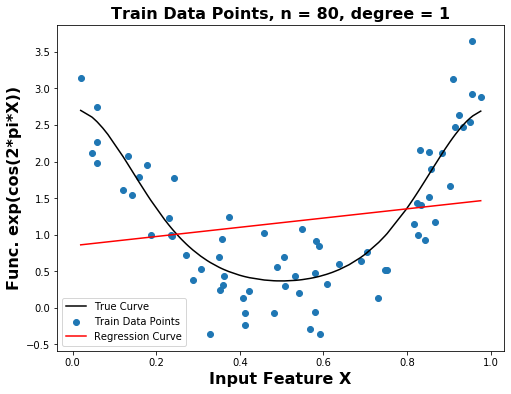

In [0]:
plt.figure(5, figsize=(8,6))
plot_13 = plt.plot(data_[:, 0], data_[:, 1], color = 'black', label='True Curve')
plot_14 = plt.scatter(data_train[:, 0], data_train[:, 2], label='Train Data Points')
plot_15 = plt.plot(data_[:, 0], RegY80Deg1, color = 'red', label='Regression Curve')
plt.xlabel('Input Feature X', fontweight='bold', fontsize=16)
plt.ylabel('Func. exp(cos(2*pi*X))', fontweight='bold', fontsize=16)
plt.legend(handles = [plot_13[0], plot_14, plot_15[0]], loc = 'lower left')
plt.title('Train Data Points, n = 80, degree = 1', fontweight='bold', fontsize=16)
plt.savefig('tdp_80_1.png')
files.download('tdp_80_1.png')

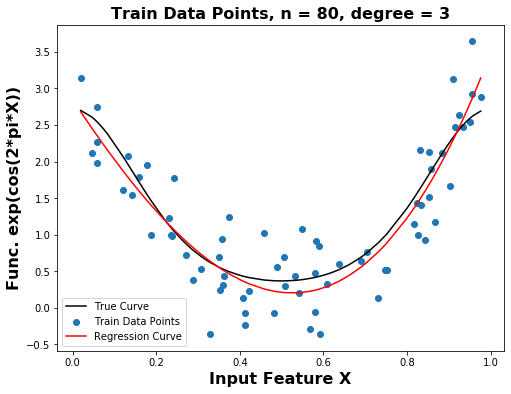

In [0]:
plt.figure(5, figsize=(8,6))
plot_16 = plt.plot(data_[:, 0], data_[:, 1], color = 'black', label='True Curve')
plot_17 = plt.scatter(data_train[:, 0], data_train[:, 2], label='Train Data Points')
plot_18 = plt.plot(data_[:, 0], RegY80Deg3, color = 'red', label='Regression Curve')
plt.xlabel('Input Feature X', fontweight='bold', fontsize=16)
plt.ylabel('Func. exp(cos(2*pi*X))', fontweight='bold', fontsize=16)
plt.legend(handles = [plot_16[0], plot_17, plot_18[0]], loc = 'lower left')
plt.title('Train Data Points, n = 80, degree = 3', fontweight='bold', fontsize=16)
plt.savefig('tdp_80_3.png')
files.download('tdp_80_3.png')

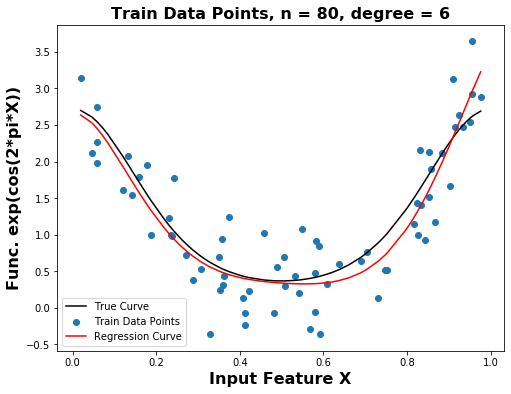

In [0]:
plt.figure(5, figsize=(8,6))
plot_19 = plt.plot(data_[:, 0], data_[:, 1], color = 'black', label='True Curve')
plot_20 = plt.scatter(data_train[:, 0], data_train[:, 2], label='Train Data Points')
plot_21 = plt.plot(data_[:, 0], RegY80Deg6, color = 'red', label='Regression Curve')
plt.xlabel('Input Feature X', fontweight='bold', fontsize=16)
plt.ylabel('Func. exp(cos(2*pi*X))', fontweight='bold', fontsize=16)
plt.legend(handles = [plot_19[0], plot_20, plot_21[0]], loc = 'lower left')
plt.title('Train Data Points, n = 80, degree = 6', fontweight='bold', fontsize=16)
plt.savefig('tdp_80_6.png')
files.download('tdp_80_6.png')

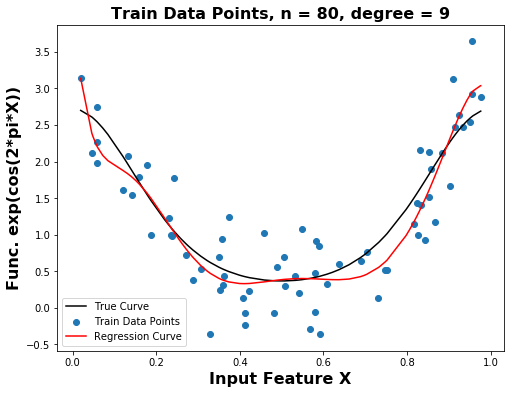

In [0]:
plt.figure(5, figsize=(8,6))
plot_22 = plt.plot(data_[:, 0], data_[:, 1], color = 'black', label='True Curve')
plot_23 = plt.scatter(data_train[:, 0], data_train[:, 2], label='Train Data Points')
plot_24 = plt.plot(data_[:, 0], RegY80Deg9, color = 'red', label='Regression Curve')
plt.xlabel('Input Feature X', fontweight='bold', fontsize=16)
plt.ylabel('Func. exp(cos(2*pi*X))', fontweight='bold', fontsize=16)
plt.legend(handles = [plot_22[0], plot_23, plot_24[0]], loc = 'lower left')
plt.title('Train Data Points, n = 80, degree = 9', fontweight='bold', fontsize=16)
plt.savefig('tdp_80_9.png')
files.download('tdp_80_9.png')

In [0]:
#bit 3, targetY vs regressionY plot
#some calculations for data_train
XTrainDeg3 = MatrixA(data_train[:, 0], 3)
RegYTrainDeg3 = np.dot(XTrainDeg3, ParamW10Deg3)

#some calculations for data_test
MatrixATestDeg3 = MatrixA(data_test[:, 0], 3)
XTestDeg3 = MatrixA(data_test[:, 0], 3)
RegYTestDeg3 = np.dot(XTestDeg3, ParamW10Deg3)

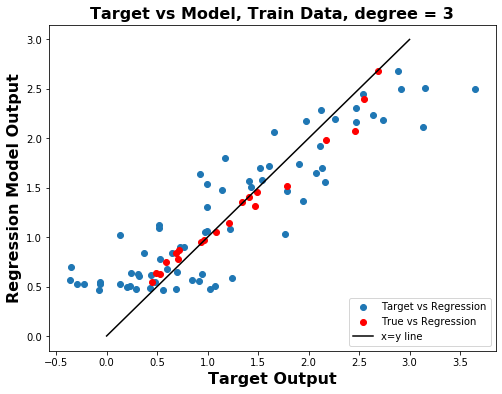

In [0]:
#train targetY vs regressionY plot
plt.figure(9, figsize=(8,6))
# plt.scatter(data_train[:, 1], RegYTrainDeg3)
plot_25 = plt.scatter(data_train[:, 2], RegYTrainDeg3, label='Target vs Regression')
plot_30 = plt.scatter(data_train[:, 1], RegYTestDeg3, color ='red', label='True vs Regression')
plot_26 = plt.plot([0, 3], [0, 3], color = 'black', label='x=y line')
# plot_26 = plt.plot([0, 3.5], [0, 3.5])
plt.xlabel('Target Output', fontweight='bold', fontsize=16)
plt.ylabel('Regression Model Output', fontweight='bold', fontsize=16)
plt.legend(handles = [plot_25, plot_30, plot_26[0]], loc = 'lower right')
plt.title('Target vs Model, Train Data, degree = 3', fontweight='bold', fontsize=16)
plt.savefig('tvsm_train1.png')
files.download('tvsm_train1.png')


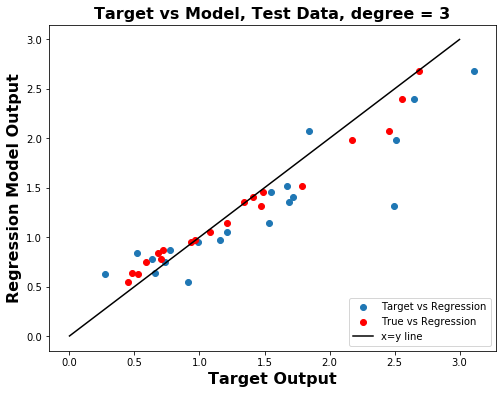

In [0]:
#test targetY vs regressionY plot
plt.figure(9, figsize=(8,6))
plot_27 = plt.scatter(data_test[:, 2], RegYTestDeg3, label='Target vs Regression')
plot_29 = plt.scatter(data_test[:, 1], RegYTestDeg3, color ='red', label='True vs Regression')
plot_28 = plt.plot([0, 3], [0, 3], color = 'black', label='x=y line')
plt.xlabel('Target Output', fontweight='bold', fontsize=16)
plt.ylabel('Regression Model Output', fontweight='bold', fontsize=16)
plt.legend(handles = [plot_27, plot_29, plot_28[0]], loc = 'lower right')
plt.title('Target vs Model, Test Data, degree = 3', fontweight='bold', fontsize=16)
plt.savefig('tvsm_test1.png')
files.download('tvsm_test1.png')

In [0]:
#rms error calculation function
def RMSError(X, W, YTarget):
  YReg = np.dot(X, W)
  RMSErr = np.dot(np.transpose(YReg - YTarget), (YReg - YTarget))/int(X.shape[0])
  RMSErr = np.sqrt(RMSErr)

  return(RMSErr)

In [0]:
XTestDeg1 = MatrixA(data_test[:, 0], 1)
XTestDeg6 = MatrixA(data_test[:, 0], 6)
XTestDeg9 = MatrixA(data_test[:, 0], 9)

XExpDeg1 = MatrixA(data_exp[:, 0], 1)
XExpDeg3 = MatrixA(data_exp[:, 0], 3)
XExpDeg6 = MatrixA(data_exp[:, 0], 6)
XExpDeg9 = MatrixA(data_exp[:, 0], 9)

In [0]:
RMSTrainError1 = RMSError(XExpDeg1, ParamW10Deg1, data_exp[:, 2])
RMSTestError1 = RMSError(XTestDeg1, ParamW10Deg1, data_test[:, 2])
RMSTrainError3 = RMSError(XExpDeg3, ParamW10Deg3, data_exp[:, 2])
RMSTestError3 = RMSError(XTestDeg3, ParamW10Deg3, data_test[:, 2])
RMSTrainError6 = RMSError(XExpDeg6, ParamW10Deg6, data_exp[:, 2])
RMSTestError6 = RMSError(XTestDeg6, ParamW10Deg6, data_test[:, 2])
RMSTrainError9 = RMSError(XExpDeg9, ParamW10Deg9, data_exp[:, 2])
RMSTestError9 = RMSError(XTestDeg9, ParamW10Deg9, data_test[:, 2])

In [0]:
degree = np.array([1, 3, 6, 9])
RMSTrain = np.array([RMSTrainError1, RMSTrainError3, RMSTrainError6, RMSTrainError9])
RMSTest = np.array([RMSTestError1, RMSTestError3, RMSTestError6, RMSTestError9])

In [0]:
print(RMSTrain)
print(RMSTest)

[0.6770769  0.24029482 0.16483927 0.03214852]
[0.75590189 0.37687988 0.45793342 6.40733573]


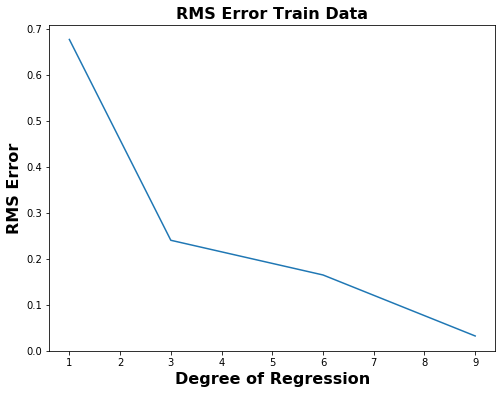

In [0]:
plt.figure(11, figsize=(8,6))
plt.plot(degree, RMSTrain)
plt.xlabel('Degree of Regression', fontweight='bold', fontsize=16)
plt.ylabel('RMS Error', fontweight='bold', fontsize=16)
plt.title('RMS Error Train Data', fontweight='bold', fontsize=16)
plt.savefig('rms_train.png')
files.download('rms_train.png')

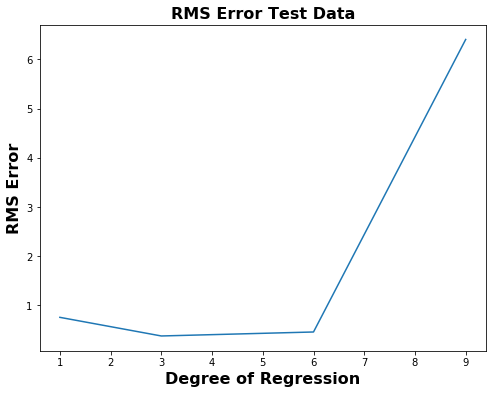

In [0]:
plt.figure(12, figsize=(8,6))
plt.plot(degree, RMSTest)
plt.xlabel('Degree of Regression', fontweight='bold', fontsize=16)
plt.ylabel('RMS Error', fontweight='bold', fontsize=16)
plt.title('RMS Error Test Data', fontweight='bold', fontsize=16)
plt.savefig('rms_test.png')
files.download('rms_test.png')